In [1]:
pip install selenium

     |████████████████████████████████| 954 kB 28.1 MB/s 
     |████████████████████████████████| 356 kB 55.4 MB/s 
     |████████████████████████████████| 138 kB 62.0 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 3.5 MB 36.7 MB/s 
     |████████████████████████████████| 54 kB 4.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, optimizers
from keras.layers import Dense,Dropout,Activation,LSTM,Embedding
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import time
from tensorflow.keras.models import Sequential
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer 
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.model_selection import train_test_split

from PIL import Image 

from bs4 import BeautifulSoup 
from selenium import webdriver 
import networkx as nx 

import pickle
import warnings 
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [3]:
all_urls = pd.read_csv('phishing_site_urls.csv')

# New Section

In [4]:
all_urls[all_urls['Label']=='bad']

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad


In [5]:
all_urls[all_urls['Label']=='good']

,URL,Label
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good
...,...,...
483590,youthleaguesusa.com/potomacsoccer/2011/Tournam...,good
483591,zip-codes.com/,good
483592,owens.edu/news-releases/?p=2052,good
483593,1.safesecureweb.com/egale/index.asp?item=1173,good


In [6]:
all_urls.isnull().sum()

URL      0
Label    0
dtype: int64

In [7]:
label_counts = pd.DataFrame(all_urls.Label.value_counts())
label_counts

,Label
good,392924
bad,156422


<BarContainer object of 2 artists>

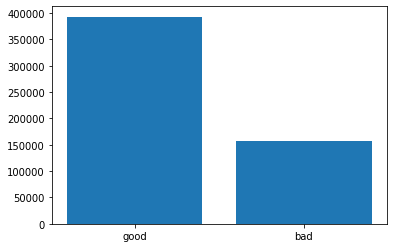

In [8]:
fig,ax = plt.subplots();
plt.bar(label_counts.index,label_counts.Label)

In [9]:
all_urls.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [10]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
tokenizer.tokenize(all_urls.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [11]:
all_urls['text_tokenized'] = all_urls.URL.map(lambda t: tokenizer.tokenize(t))

In [12]:
all_urls.head()

,URL,Label,text_tokenized
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi..."


In [13]:
stemmer = SnowballStemmer("english") 

In [14]:
all_urls['text_stemmed'] = all_urls['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
all_urls['text_stemmed'][0]

['nobel',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'skype',
 'com',
 'en',
 'cgi',
 'bin',
 'verif',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profil',
 'ach',
 'outdat',
 'page',
 'tmpl',
 'p',
 'gen',
 'fail',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [15]:
all_urls['text'] = all_urls['text_stemmed'].map(lambda l: ' '.join(l))
all_urls.head()

,URL,Label,text_tokenized,text_stemmed,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [16]:
bad_sites = all_urls[all_urls.Label == 'bad']
good_sites = all_urls[all_urls.Label == 'good']

In [17]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [18]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [19]:
all_urls['Label'] = all_urls['Label'].replace(to_replace=['bad', 'good'], value=[0, 1])

In [20]:
all_urls_sample = all_urls.sample(frac=0.4)
all_urls_sample.head()

,URL,Label,text_tokenized,text_stemmed,text
29850,www.globallaunchformula.net/~be/paypal/_webscr...,0,"[www, globallaunchformula, net, be, paypal, we...","[www, globallaunchformula, net, be, paypal, we...",www globallaunchformula net be paypal webscr p...
500922,treasure-force.com/87b3ff3rc,0,"[treasure, force, com, b, ff, rc]","[treasur, forc, com, b, ff, rc]",treasur forc com b ff rc
254276,uslawyersdb.com/attorney501727,1,"[uslawyersdb, com, attorney]","[uslawyersdb, com, attorney]",uslawyersdb com attorney
195416,gutenberg.org/ebooks/10547,1,"[gutenberg, org, ebooks]","[gutenberg, org, ebook]",gutenberg org ebook
156477,carolynyarnell.com/bio.html,1,"[carolynyarnell, com, bio, html]","[carolynyarnel, com, bio, html]",carolynyarnel com bio html


In [21]:
all_urls_sample['URL']

29850     www.globallaunchformula.net/~be/paypal/_webscr...
500922                         treasure-force.com/87b3ff3rc
254276                       uslawyersdb.com/attorney501727
195416                           gutenberg.org/ebooks/10547
156477                          carolynyarnell.com/bio.html
                                ...                        
477711                      youtube.com/watch?v=qYN5A2M6ETM
414071            picktorrent.com/torrents/e5/paul-dillett/
345692                     gilstelevisionandappliances.com/
498533                              steelfs.com.mx/00ucikvv
186004    faculty.marianopolis.edu/c.belanger/QuebecHist...
Name: URL, Length: 219738, dtype: object

In [22]:
from collections import Counter

def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word]+=1
    return count

In [23]:
text = good_sites['text']
counter = counter_word(text)

In [24]:
counter

Counter({'esxcc': 8,
         'com': 292976,
         'js': 67,
         'index': 14136,
         'htm': 25712,
         'us': 4313,
         'battl': 229,
         'net': 15147,
         'noghn': 1,
         'en': 21918,
         'ref': 192,
         'm': 4055,
         'd': 5816,
         'bbws': 1,
         'b': 9097,
         'tnefnud': 1,
         'j': 1723,
         'y': 1175,
         'p': 6872,
         'lr': 19,
         'cmp': 188,
         't': 4255,
         'i': 3522,
         'q': 3566,
         'jq': 11,
         'vt': 155,
         'srdig': 1,
         'v': 10495,
         'fk': 14,
         'fv': 17,
         'x': 2609,
         'my': 665,
         'r': 2355,
         's': 8496,
         'ki': 44,
         'zb': 20,
         'tu': 111,
         'em': 98,
         'lmj': 1,
         'c': 13327,
         'e': 6379,
         'el': 329,
         'l': 2931,
         'h': 1465,
         'u': 1606,
         'g': 2429,
         'ip': 125,
         'o': 1414,
         'tv': 254

In [25]:
num_words = len(counter)
max_length = 30
num_words

227762

In [26]:
train_size = int(all_urls_sample.shape[0]*0.8)

train_sentences = all_urls_sample.text[:train_size]
train_labels = all_urls_sample.Label[:train_size]

test_sentences = all_urls_sample.text[train_size:]
test_labels = all_urls_sample.Label[train_size:]

In [27]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = num_words)
tokenizer.fit_on_texts(train_sentences)

In [32]:
word_index = tokenizer.word_index
word_index

{'com': 1,
 'html': 2,
 'd': 3,
 'php': 4,
 'www': 5,
 'org': 6,
 'a': 7,
 'c': 8,
 'f': 9,
 'htm': 10,
 'e': 11,
 'net': 12,
 'amp': 13,
 'b': 14,
 'index': 15,
 'en': 16,
 'login': 17,
 'ca': 18,
 'wiki': 19,
 's': 20,
 'id': 21,
 'us': 22,
 'wikipedia': 23,
 'co': 24,
 'wp': 25,
 'v': 26,
 'the': 27,
 'uk': 28,
 'paypal': 29,
 'edu': 30,
 'aspx': 31,
 'in': 32,
 'peopl': 33,
 'of': 34,
 'news': 35,
 'p': 36,
 'page': 37,
 'm': 38,
 'watch': 39,
 'battl': 40,
 'content': 41,
 'info': 42,
 'cgi': 43,
 'imag': 44,
 'youtub': 45,
 'facebook': 46,
 'de': 47,
 'articl': 48,
 'blogspot': 49,
 'db': 50,
 'n': 51,
 't': 52,
 'g': 53,
 'cmd': 54,
 'topic': 55,
 'secur': 56,
 'and': 57,
 'q': 58,
 'yahoo': 59,
 'ru': 60,
 'i': 61,
 'bin': 62,
 'x': 63,
 'js': 64,
 'asp': 65,
 'webscr': 66,
 'name': 67,
 'l': 68,
 'citi': 69,
 'dispatch': 70,
 'home': 71,
 'to': 72,
 'app': 73,
 'montreal': 74,
 'site': 75,
 'ref': 76,
 'view': 77,
 'amazon': 78,
 'w': 79,
 'br': 80,
 'includ': 81,
 'au': 82,
 

In [33]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)

In [34]:
train_sequences[0]

[5,
 49320,
 12,
 152,
 29,
 66,
 4,
 54,
 202,
 303,
 1737,
 79,
 92,
 2237,
 2238,
 2239,
 2198,
 91,
 1502,
 1339,
 2240,
 1381,
 2241,
 70,
 102,
 58,
 79,
 26,
 83,
 51,
 20,
 11,
 9,
 14,
 38,
 58,
 51,
 88,
 8,
 63,
 63,
 92,
 51,
 20,
 8,
 11]

In [35]:
from keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(
    train_sequences, maxlen = max_length, padding = "post", truncating = "post"
)

In [36]:
train_padded[0]

array([    5, 49320,    12,   152,    29,    66,     4,    54,   202,
         303,  1737,    79,    92,  2237,  2238,  2239,  2198,    91,
        1502,  1339,  2240,  1381,  2241,    70,   102,    58,    79,
          26,    83,    51], dtype=int32)

In [37]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(
    test_sequences, maxlen = max_length, padding = "post", truncating = "post"
)

In [38]:
test_padded[0]

array([  78,    1, 3288,  328,   96,   44,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [39]:
print(all_urls_sample.text.iloc[20])
print(train_sequences[20])

babysitt gen tr va php index php action login
[21040, 1761, 561, 1406, 4, 15, 4, 311, 17]


In [40]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [41]:
def decode(text):
    return " ".join([reverse_word_index.get(i,"?") for i in text])

In [42]:
decode(train_sequences[20])

'babysitt gen tr va php index php action login'

In [43]:
from keras.initializers import Constant
model = Sequential()
model.add(Embedding(num_words,32,input_length = max_length))
model.add(LSTM(64, dropout=0.1))
model.add(Dense(1,activation = "sigmoid"))
optimizer = Adam(learning_rate = 3e-4)
model.compile(loss="binary_crossentropy",optimizer = optimizer, metrics = ["accuracy"])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 32)            7288384   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 7,313,281
Trainable params: 7,313,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_padded,train_labels,epochs=5,validation_data=(test_padded,test_labels),batch_size=20)

Epoch 1/5
8790/8790 [==============================] - 749s 85ms/step - loss: 0.1533 - accuracy: 0.9402 - val_loss: 0.1183 - val_accuracy: 0.9598
Epoch 2/5
8790/8790 [==============================] - 740s 84ms/step - loss: 0.0568 - accuracy: 0.9819 - val_loss: 0.1019 - val_accuracy: 0.9675
Epoch 3/5
8790/8790 [==============================] - 742s 84ms/step - loss: 0.0272 - accuracy: 0.9923 - val_loss: 0.1114 - val_accuracy: 0.9671
Epoch 4/5
8790/8790 [==============================] - 744s 85ms/step - loss: 0.0159 - accuracy: 0.9954 - val_loss: 0.1176 - val_accuracy: 0.9668
Epoch 5/5
8790/8790 [==============================] - 728s 83ms/step - loss: 0.0108 - accuracy: 0.9970 - val_loss: 0.1384 - val_accuracy: 0.9675


In [ ]:
train_loss, train_accuracy= model.evaluate(train_padded, train_labels, verbose=False)
test_loss, test_accuracy= model.evaluate(test_padded, test_labels, verbose=False)

print('train accuracy', train_accuracy)
print('test accuracy', test_accuracy)